El modelo de Gompertz es un modelo de crecimiento que puede ser utilizado en el análisis de crecimiento tumoral, dado por:

\begin{equation}
\dot{N}(t)=\lambda N(t) \log\left(\frac{\theta}{N(t)}\right)
\end{equation}

Donde N es el tamaño del tumor, $\lambda$ es la constante relacionada a la capacidad de crecimiento de las células cancerígenas, y $\theta$ es la capacidad o tamaño máximo del tumor.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

In [5]:

def Gompertz(x,t):
  l=0.5
  tt=10
  dxdt= l*x*np.log10(tt/x)
  return dxdt

ini= 1
t=np.arange(1,100,0.1)

In [6]:
result= integrate.odeint(Gompertz,ini,t)

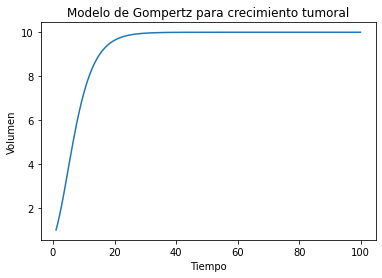

In [9]:
plt.plot(t,result)
plt.title('Modelo de Gompertz para crecimiento tumoral')
plt.xlabel('Tiempo')
plt.ylabel('Volumen');

Además, para aplicaciones más acordes a la realidad, se puede utilizar un modelo de Hahnfeldt-Folkman, donde se considera $K(t)$ como vascularización efectiva, y los parámetros λ, β, γ y δ representan respectivamente la
tasa de crecimiento del tumor, la tasa de eliminación de vascularización y los
coeficientes de estimulación e inhibición.

\begin{equation}
\dot{N}(t)= \lambda N(t)\log\left(\frac{K(t)}{N(t)}\right)
\end{equation},
\begin{equation}
\dot{K}(t)= -\beta K(t)+\gamma N(t)- \delta K(t) N(t)^\frac{2}{3}
\end{equation}

In [48]:
l=0.5
b=2
c=10
d=2
def HF(ec,t):
  x, k =ec
  return l*x*np.log10(k/x), -b*k+c*x-d*k*x**(2/3)

In [53]:
ini1= [1,1]
t=np.arange(1,100,0.1)
res=integrate.odeint(HF,ini1,t)

N, K=res.T

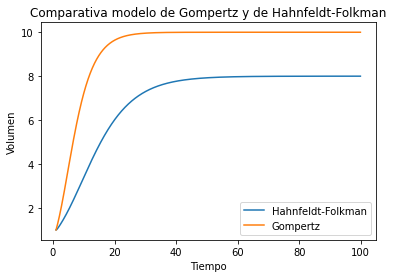

In [55]:
plt.plot(t,N, label='Hahnfeldt-Folkman')
plt.plot(t,result, label='Gompertz')
plt.xlabel('Tiempo')
plt.ylabel('Volumen')
plt.title('Comparativa modelo de Gompertz y de Hahnfeldt-Folkman')
plt.legend();

Ahora bien, si consideramos aplicar una terapia con un fármaco, la concentración del mismo puede ser descrita por el modelo de Bellman:

\begin{equation}
\dot{v}(t)=u(t)-\gamma v(t)
\end{equation}

Donde u representa el incremento en la concentración debido al suministro del medicamento, y $\gamma$ es la tasa de crecimiento. Consideraremos $v_0= 0$ al inicio del tratamiento.
Además, u está dada por $u(t)= \sum_1^N u_iH(t-t_i)$. Donde H(t) es la función escalón unitario.

Por último, la ecuación que describe el crecimiento del tumor bajo efectos de terapia es:
\begin{equation}
\dot{N}(t)= \lambda N \log \left(\frac{\theta}{N} \right) -k(v-v_t)+N
\end{equation}

In [87]:
l=0.5
tt=10*10**4
k=1
vt=0.05
for i in range(20):
  v=np.exp(-2.1*(t-i))


In [88]:
def Gompt(x,t):
   
  dx_dt=l*x*np.log10(tt/x)-k*(v-vt)
  return dx_dt

In [89]:
ini2= 5*10**4
t=np.arange(0,100,0.5)
result2=integrate.odeint(Gompt,ini2,t)

RuntimeError: ignored

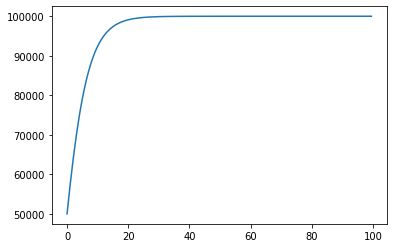

In [68]:
plt.plot(t,result2)